
Kelompok E
1. Abiel Athaya Putra (2006532891)
2. Auranissa Efrida (2006571192)
3. Ghefira Nur Fatimah Widyasari (2006483694)
4. Raafi Putri Ramadhani Salamah (2006570952)
5. Sachi Kirana Hera Singh (2006572926)
6. Vito Waradana (2006482073)

**Berikut merupakan link untuk video presentasi dari kelompok E : https://drive.google.com/drive/folders/14zuehIj03EvEFtHuGTMd0gu5ootGckH5?usp=sharing**


# **Data Pre-Processing**

In [ ]:
! pip install --upgrade git+https://github.com/kevctae/twint.git
! pip install nest_asyncio
! pip install Sastrawi
! pip install unidecode
! pip install pyg-nightly

import warnings; warnings.simplefilter('ignore')
import itertools, re, nltk
import time, numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns 
from matplotlib.colors import ListedColormap
from textblob import TextBlob
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from unidecode import unidecode
from nltk.tag import CRFTagger
from html import unescape
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from tqdm import tqdm
import nltk
nltk.download('punkt')

factory = StopWordRemoverFactory()
stemmer = StemmerFactory().create_stemmer()
sns.set(style="ticks", color_codes=True)
random_state = 170
'Done'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/kevctae/twint.git to /tmp/pip-req-build-x607l7mn
  Running command git clone -q https://github.com/kevctae/twint.git /tmp/pip-req-build-x607l7mn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 527 kB 5.3 MB/s 
     |████████████████████████████████| 512 kB 42.8 MB/s 
     |████████████████████████████████| 280 kB 53.1 MB/s 
  Created wheel for pyg-nightly: filename=pyg_nightly-2.2.0.dev20221230-py3-none-any.whl size=808839 sha256=a6abcb1416fbd89fd5525b3e6bb2463774c00c2413e49c5505

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


'Done'

In [ ]:
import warnings; warnings.simplefilter('ignore')
import nltk

try:
    import google.colab
    IN_COLAB = True
    !wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudataEDA02CTA.py
    !wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudata_sna.py
    !wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/network_unp2021.gexf
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/data_sna.csv
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/slang.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_id.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_en.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/kata_dasar.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/wn-ind-def.tab
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/wn-msa-all.tab
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/all_indo_man_tag_corpus_model.crf.tagger

    !pip install --upgrade spacy python-crfsuite unidecode textblob sastrawi sklearn-pycrfsuite
    !pip install --upgrade unidecode twython tweepy beautifulsoup4 json_lines lxml pyLDAvis json_lines
    !python -m spacy download xx_ent_wiki_sm
    !python -m spacy download en_core_web_sm
    nltk.download('popular')
except:
    IN_COLAB = False
    print("Running the code locally, please make sure all the python module versions agree with colab environment and all data/assets downloaded")


--2022-12-30 09:44:45--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudataEDA02CTA.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8834 (8.6K) [text/plain]
Saving to: ‘taudataEDA02CTA.py’

taudataEDA02CTA.py  100%[===================>]   8.63K  --.-KB/s    in 0s      

2022-12-30 09:44:45 (37.3 MB/s) - ‘taudataEDA02CTA.py’ saved [8834/8834]

--2022-12-30 09:44:46--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudata_sna.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26207

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 101 kB 7.4 MB/s 
     |████████████████████████████████| 128 kB 55.7 MB/s 
     |████████████████████████████████| 1.7 MB 67.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=6876f730b9e4d13684b9c2730570329979e94a6f51e93eb445ca47d82b70a41d
  Stored in directory: /root/.cache/pip/wheels/90/61/ec/9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=2c902e3170eae6d993169ac626ea9bbef2ad0ccdaaf8636b4dc5f5badddc4339
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built pyLDAvis skl

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

In [ ]:
import time, numpy as np, matplotlib.pyplot as plt, pandas as pd, networkx as nx 

from graphviz import Digraph

In [ ]:
# Loading Stopwords: Ada beberapa cara

Sastrawi_StopWords_id = factory.get_stop_words()
#Penambahan stop words yang tidak ada di kamus
newStopWords_id = ['udah','jadi','aja','kalau','sama','abis','nya','bakal','nih','sih','gmn','dah','kalo','yaah','gimana'] 
Sastrawi_StopWords_id.extend(newStopWords_id)
print(Sastrawi_StopWords_id)
print(len(Sastrawi_StopWords_id))

Sastrawi_StopWords_id = set(Sastrawi_StopWords_id) # Biasakan hal ini

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [ ]:
import twint
import nest_asyncio
nest_asyncio.apply()
import pandas as pd
nest_asyncio.apply()
config = twint.Config()
config.Hide_output = True
config.Pandas = True
config.Retweets = True
config.Profile_full = True
"Done"

'Done'

In [ ]:
#config.Username = "piala dunia"
config.Search = '"pildun" lang:id until:2022-12-25 since:2022-11-20'
config.Limit = 12000
config.Since 

twint.run.Search(config)
data = twint.storage.panda.Tweets_df
del twint, config, nest_asyncio
print(data.shape)

data.head()

(12002, 38)


,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1606799567852539906,1606695430120931329,1.671926e+12,2022-12-24 23:50:44,+0000,,"@kinaru_ @MalihDhakal @registaco Main, ngacak ...",in,[],[],...,,,,,,"[{'screen_name': 'kinaru_', 'name': '🌱', 'id':...",,,,
1,1606797011487166466,1606794412079874049,1.671925e+12,2022-12-24 23:40:35,+0000,,@Info_Ronaldo7 @idextratime Lawakan dodolover ...,in,[],[],...,,,,,,"[{'screen_name': 'Info_Ronaldo7', 'name': 'Jho...",,,,
2,1606795967717855232,1606795967717855232,1.671925e+12,2022-12-24 23:36:26,+0000,,"Sejak liat jerman di pildun, gue bilang juga a...",in,[],[],...,,,,,,[],,,,
3,1606795117314310144,1606795117314310144,1.671925e+12,2022-12-24 23:33:03,+0000,,Mo salah mo salah lagi lagi lu ye. Pantes mesi...,in,[],[],...,,,,,,[],,,,
4,1606793057579716610,1606622822406983681,1.671924e+12,2022-12-24 23:24:52,+0000,,@CNNIndonesia Pake baju prancis di indonesia w...,in,[],[],...,,,,,,"[{'screen_name': 'CNNIndonesia', 'name': 'CNN ...",,,,


In [ ]:
data.to_csv("C:\\Users\ASUS\Downloads\CleanedPildunTwitter.csv")

In [ ]:
##data diupload ke github agar tidak lama kembali saat menarik data. Data tidak akan berubah karena sudah ditentukan waktunya
uncleaned=pd.read_csv('https://raw.githubusercontent.com/auranissaefrida/FinalProjectDataMining/main/C__Users_ASUS_Downloads_PildunTwitterUncleaned%20(1).csv')

In [ ]:
uncleaned.to_json(r'data_tweet.json')
"Done"

'Done'

In [ ]:
uncleaned = uncleaned[['tweet']]
uncleaned.at[0,'tweet']

'@kinaru_ @MalihDhakal @registaco Main, ngacak ngacak Arsenal di Final UEL bahkan. Doi pas top form juga di Pildun 2018, gendong Belgia sampek juara 3.'

In [ ]:
def cleanText(txt):
    docx = unidecode(unescape(txt.lower().strip()))
    urlPattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    docx = re.sub(urlPattern,' ', docx) # Remove links
    docx = re.sub(r'[^\w]', ' ', docx) # Remove Symbol, keep "_" ... recommended
    Tokens = TextBlob(docx).words # Tokenisasi 
    docx = ' '.join([t for t in Tokens if str(t) not in Sastrawi_StopWords_id and len(t)>2]) # Stopwords filtering
    docx = stemmer.stem(docx)
    return docx 

In [ ]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

In [ ]:
uncleaned['clean_tweet'] = np.vectorize(remove_pattern)(uncleaned['tweet'], "@[\w]*") #menghilangkan @user untuk Sentimen Analysis

In [ ]:
uncleaned['clean_tweet'] = '' # inititate kolom kosong

In [ ]:
#membersihkan data

for idx, post in tqdm(uncleaned.iterrows()):
    uncleaned.at[idx, 'clean_tweet'] = cleanText(post.clean_tweet)

uncleaned.head()

12001it [39:23,  5.08it/s]


,tweet,clean_tweet
0,"@kinaru_ @MalihDhakal @registaco Main, ngacak ...",main ngacak ngacak arsenal final uel bahkan do...
1,@Info_Ronaldo7 @idextratime Lawakan dodolover ...,lawa dodolover pagi hari idola noh lama pildun...
2,"Sejak liat jerman di pildun, gue bilang juga a...",sejak liat jerman pildun gue bilang apa adab b...
3,Mo salah mo salah lagi lagi lu ye. Pantes mesi...,salah salah pantes mesir masuk pildun fix gaco...
4,@CNNIndonesia Pake baju prancis di indonesia w...,pake baju prancis indonesia waktu pildun haram


In [ ]:
df=uncleaned.to_csv("C:\\Users\ASUS\Downloads\CleanedPildunTwitter.csv")

In [ ]:
df.shape

(12001, 3)

In [ ]:
df= pd.read_csv('https://raw.githubusercontent.com/auranissaefrida/FinalProjectDataMining/main/C__Users_ASUS_Downloads_CleanedPildunTwitter%20(1).csv')

In [ ]:
df.shape

(12001, 3)

In [ ]:
df.isna().sum() #melihat nilai yg kosong

Unnamed: 0     0
tweet          0
clean_tweet    2
dtype: int64

In [ ]:
df.dropna(inplace=True)
df.shape

(11999, 3)

In [ ]:
df.duplicated().sum()

0

# **EDA dan SNA**

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
df.head()

,Unnamed: 0,tweet,clean_tweet
0,0,"@kinaru_ @MalihDhakal @registaco Main, ngacak ...",main ngacak ngacak arsenal final uel bahkan do...
1,1,@Info_Ronaldo7 @idextratime Lawakan dodolover ...,lawa dodolover pagi hari idola noh lama pildun...
2,2,"Sejak liat jerman di pildun, gue bilang juga a...",sejak liat jerman pildun gue bilang apa adab b...
3,3,Mo salah mo salah lagi lagi lu ye. Pantes mesi...,salah salah pantes mesir masuk pildun fix gaco...
4,4,@CNNIndonesia Pake baju prancis di indonesia w...,pake baju prancis indonesia waktu pildun haram


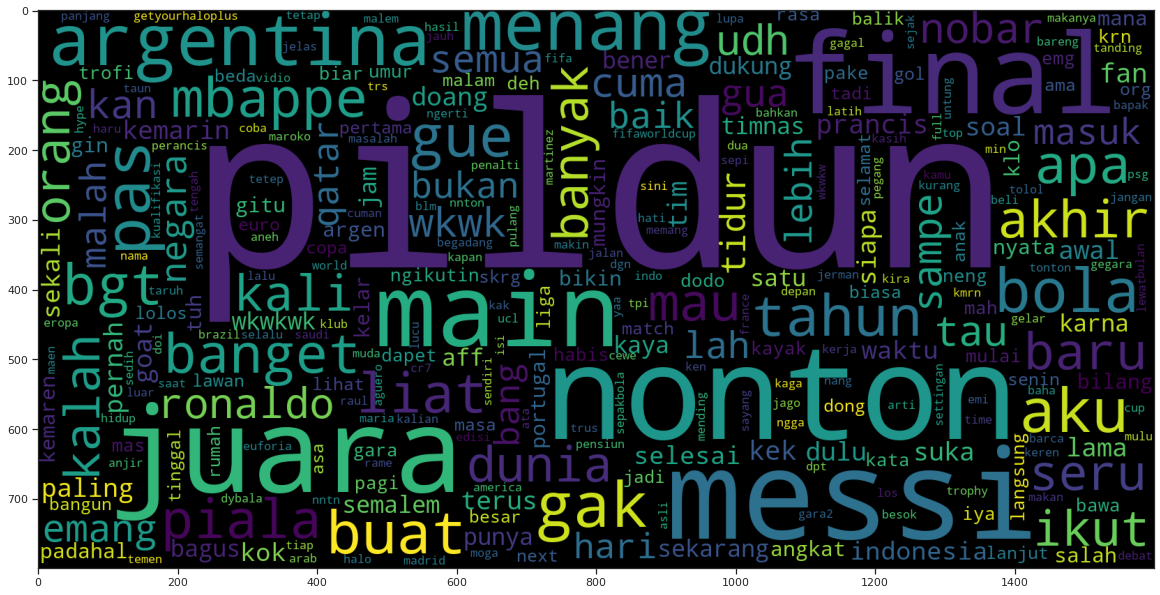

In [ ]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 300 , width = 1600 , height = 800,
               collocations=False).generate(",".join([str(i) for i in df['clean_tweet']]))
plt.imshow(wc)

Dari wordclouds, dapat dilihat kata yang sering digunakan oleh pengguna twitter pada topik yang dipilih adalah main,argentina, menang,nonton, messi, juara,kalah, prancis, tahun, bola, dsb. Hal ini sangat wajar apalagi atas kemenangan argentina dan tendangan pinalti messi.

In [ ]:
df.to_csv("final.txt", header=None, index=None, sep=',', mode='w') #untuk voyant tools

Untuk EDA lebih lanjut, akan digunakan Voyan Tools

## **Social Network Analytics**

In [ ]:
#SNA
import warnings; warnings.simplefilter('ignore')
import nltk

try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False
    print("Running the code locally, please make sure all the python module versions agree with colab environment and all data/assets downloaded")

In [ ]:
# import beberapa module yg dibutuhkan di WorkShop ini:
import warnings; warnings.simplefilter('ignore')
import time, numpy as np, matplotlib.pyplot as plt, pandas as pd, networkx as nx

seed = 0
np.random.seed(seed)
"Done"

'Done'

In [ ]:
uncleaned=pd.read_csv('https://raw.githubusercontent.com/auranissaefrida/FinalProjectDataMining/main/C__Users_ASUS_Downloads_PildunTwitterUncleaned%20(1).csv')

In [ ]:
data1 = uncleaned.rename({'username': 'user'}, axis=1) 
data1 = data1[['user', 'tweet']]
data1.head()

,user,tweet
0,SecondFiddle_,"@kinaru_ @MalihDhakal @registaco Main, ngacak ..."
1,BacksapceAlt,@Info_Ronaldo7 @idextratime Lawakan dodolover ...
2,Rafikoli,"Sejak liat jerman di pildun, gue bilang juga a..."
3,Rafikoli,Mo salah mo salah lagi lagi lu ye. Pantes mesi...
4,HadimaulanaY,@CNNIndonesia Pake baju prancis di indonesia w...


In [ ]:
users = data1.user.to_list()
tweets = data1.tweet.to_list()
print( users[:7] )

['SecondFiddle_', 'BacksapceAlt', 'Rafikoli', 'Rafikoli', 'HadimaulanaY', 'errn_511', 'booedhe']


In [ ]:
print(tweets[:3])

['@kinaru_ @MalihDhakal @registaco Main, ngacak ngacak Arsenal di Final UEL bahkan. Doi pas top form juga di Pildun 2018, gendong Belgia sampek juara 3.', '@Info_Ronaldo7 @idextratime Lawakan dodolover di pagi hari 🤣🤣 idola lo noh  selama pildun jadi beban,rating paling jelek 🤣the  real beban portugal di pildun 2022  https://t.co/3Bbwo9GYcf', 'Sejak liat jerman di pildun, gue bilang juga apa peradaban barat 1000 tahun lebih telat kan']


In [ ]:
G = nx.Graph() # Graph Kosong Baru
G.add_nodes_from(users)

print('Banyak vertex = ', G.number_of_nodes())
print('Banyak Edges = ', G.number_of_edges())

Banyak vertex =  9905
Banyak Edges =  0


In [ ]:
import re

t = "@tempodotco @rcti_id Sayang banget hak siarnya rcti Kemarin pildun sctv lancar jaya dr pertandingan pertama sampai final"
mentionS =  re.findall("@([a-zA-Z0-9]{1,15})", t)

mentionS

['tempodotco', 'rcti']

In [ ]:
for usr, t in zip(users, tweets):
    mentionS =  re.findall("@([a-zA-Z0-9]{1,15})", t)
    for mention in mentionS:
        if "." not in mention: #skipping emails
            G.add_edge(usr, mention)
            
print('Banyak vertex = ', G.number_of_nodes())
print('Banyak Edges = ', G.number_of_edges())

Banyak vertex =  13192
Banyak Edges =  8638


In [ ]:
print("Export dalam GexF untuk di import ke Gephi")
nx.write_gexf(G, "pildun.gexf")

Export dalam GexF untuk di import ke Gephi


In [ ]:
! pip install seed
! pip install --user scipy==1.8.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import operator

def Centrality(G, N=10, method='katz', outliers=False, Label = True, layOut='shells'):
    if method.lower()=='katz':
        phi = 1.618033988749895 # largest eigenvalue of adj matrix
        ranking = nx.katz_centrality_numpy(G,1/phi)
    elif method.lower() == 'degree':
        ranking = nx.degree_centrality(G)
    elif method.lower() == 'eigen':
        ranking = nx.eigenvector_centrality_numpy(G)
    elif method.lower() =='closeness':
        ranking = nx.closeness_centrality(G)
    elif method.lower() =='betweeness':
        ranking = nx.betweenness_centrality(G)
    elif method.lower() =='harmonic':
        ranking = nx.harmonic_centrality(G)
    elif method.lower() =='percolation':
        ranking = nx.percolation_centrality(G)
    else:
        print('Error, Unsupported Method.'); return None

    important_nodes = sorted(ranking.items(), key=operator.itemgetter(1))[::-1]#[0:Nimportant]
    data = np.array([n[1] for n in important_nodes])
    dnodes = [n[0] for n in important_nodes][:N]
    if outliers:
        m = 1 # 1 standard Deviation CI
        data = data[:N]
        out = len(data[abs(data - np.mean(data)) > m * np.std(data)]) # outlier within m stDev interval
        if out<N:
            dnodes = [n for n in dnodes[:out]]

    print('Influencial Users: {0}'.format(str(dnodes)))
    print('Influencial Users Scores: {0}'.format(str(data[:len(dnodes)])))
    Gt = G.subgraph(dnodes)
    return Gt

def drawGraph(G, Label, layOut='spring', graphStyle=False, K = 200):
    if graphStyle:
        ranking = nx.degree_centrality(G)
        warna = list(ranking.values())
        d = nx.degree(G)
        d = [d[node]*K for node in G.nodes()]
        pos = nx.spring_layout(G) # Spring LayOut
        nx.draw_networkx_nodes(G,pos, node_color=warna,node_size=d) # Gambar Vertex
        nx.draw_networkx_edges(G,pos,width=2,alpha=0.1) # Gambar edges
        nx.draw_networkx_labels(G,pos) #Gambar Label Nodes
        plt.show() # Show the graph
    else:
        if layOut.lower()=='spring':
            pos = nx.spring_layout(G)
        elif layOut.lower()=='circular':
            pos=nx.circular_layout(G)
        elif layOut.lower()=='random':
            pos = nx.random_layout(G)
        elif layOut.lower()=='shells':
            shells = [G.core_nodes,sorted(G.major_building_routers, key=lambda n: nx.degree(G.topo, n)) + G.distribution_routers + G.server_nodes,G.hosts + G.minor_building_routers]
            pos = nx.shell_layout(G, shells)
        elif layOut.lower()=='spectral':
            pos=nx.spectral_layout(G)
        else:
            print('Graph Type is not available.')
            return
        nx.draw_networkx_nodes(G,pos, alpha=0.2,node_color='blue',node_size=600)
        if Label:
            nx.draw_networkx_labels(G,pos)
        nx.draw_networkx_edges(G,pos,width=4)
        plt.show()

In [ ]:
# Let's now examine, who are the most "important" users in this Graph?
Gt = Centrality(G, N=7, method='degree', outliers=False, Label = True, layOut='spring')

Influencial Users: ['idextratime', 'convomfs', 'SiaranBolaLive', 'FaktaSepakbola', 'Askrlfess', 'The', 'tanyakanrl']
Influencial Users Scores: [0.0875597  0.01334243 0.01281177 0.01212948 0.01182625 0.0073535
 0.00644379]


Yang mengambil banyak peran pada qry "PILDUN" adalah @idextratime @SiaranBolaLive @convomfs @Askrlfess @Faktasepakbola

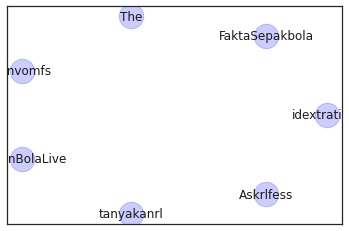

In [ ]:
drawGraph(Gt, True, layOut='circular')

Didapat bahwa user twitter yang memiliki "peran paling penting" dalam Graph yaitu 'idextratime', 'SiaranBolaLive', 'convomfs', 'Askrlfess', 'FaktaSepakbola', 'The', 'tanyakanrl'. Dengan score terbesar dipegang oleh user twitter 'idextratime'. Hal ini menunjukkan bahwa username-username tersebut cenderung memiliki sebagian besar informasi atau dapat dengan cepat terhubung dengan jaringan yang lebih luas.

In [ ]:
Gt = Centrality(G, N=7, method='closeness', outliers=False, Label = True, layOut='spring')

Influencial Users: ['idextratime', 'IqbalQuosophy', 'triwantororudi', 'manczae', 'Kirasaaa', 'mantansekamar', 'yayapunyasaya']
Influencial Users Scores: [0.14040325 0.11059202 0.11021316 0.10958303 0.10913166 0.10887446
 0.10805821]


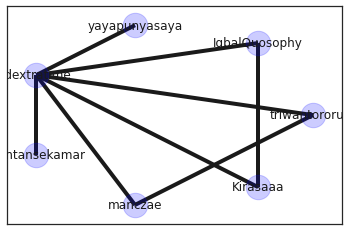

In [ ]:
drawGraph(Gt, True, layOut='circular')


Didapat dari Graph dan perhitungan yang dilakukan, user twitter "idextratime" memiliki peran penting dan memiliki influence atau pengaruh yang besar dalam menyebarkan informasi mengenai putaran piala dunia 2022 untuk user twitter lainnya.

In [ ]:
Gt = Centrality(G, N=7, method='betweeness', outliers=False, Label = True, layOut='spring')

Influencial Users: ['idextratime', 'Askrlfess', 'SiaranBolaLive', 'tanyakanrl', 'killedbyfeb', 'convomfs', 'FaktaSepakbola']
Influencial Users Scores: [0.113233   0.01552974 0.01359238 0.0121982  0.01147399 0.01107681
 0.01063329]


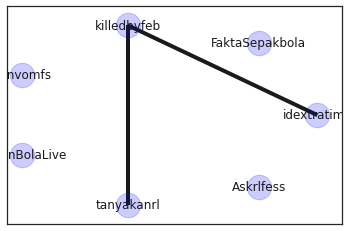

In [ ]:
drawGraph(Gt, True, layOut='circular')

Dari hasil graph diatas, didapat bahwa username "killedbyfeb" menjadi 'jembatan' atau penghubung antara username "idextratime" dan "tanyakann". Artinya username yang menjadi 'jembatan' mempengaruhi aliran informasi di sekitar sistem.

# **Sentiment Analysis**

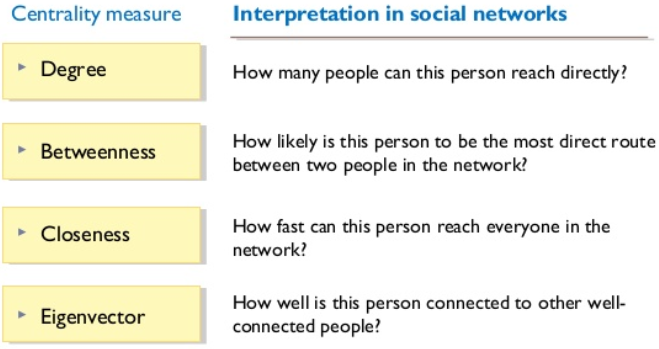

Sentimen Analysis

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/auranissaefrida/FinalProjectDataMining/main/C__Users_ASUS_Downloads_CleanedPildunTwitter%20(1).csv')

In [ ]:
df.sample(5)

,Unnamed: 0,tweet,clean_tweet
4954,4954,@idextratime Gue masih penasaran apakabarnya y...,gue penasaran apakabarnya yaa awal mulai pildu...
12000,12000,dilain sisi kita juga harus mengapresiasi kerj...,lain sisi apresiasi kerja keras tuan muda mbap...
11760,11760,"pildun kelar, gue juga kelar😎 https://t.co/La...",pildun kelar gue kelar
7532,7532,"makasi pildun, skrg aku jadi makin apal lagu k...",makas pildun skrg aku makin apal lagu bangsa p...
11967,11967,Hahahaha seru bgt ternyata ikutan nonton final...,hahahaha seru bgt nyata ikut nonton final pildun


In [ ]:
#NLP using Textblob
from textblob import TextBlob
#Create a function to get the subjectivity
def getSubjectivity(twt):
  return TextBlob(twt).sentiment.subjectivity

#Create a function to get the polarity
def getPolarity(twt):
  return TextBlob(twt).sentiment.polarity


In [ ]:
from nltk import translate
from textblob import TextBlob
translated = []
index_tweet = []
for i in range (0,len(df['clean_tweet'])):
  try:
    t = TextBlob(df['clean_tweet'][i])
    dt = t.translate(from_lang='id', to = 'en')
    index_tweet.append(i)
  except Exception as e:
    continue
  translated.append(str(dt))
len(translated)

11956

In [ ]:
Tweet = []
Sentimen =[]
for i in range(0,len(translated)):
  T = str(df['clean_tweet'][index_tweet[i]])
  Tweet.append(T)
  pol = TextBlob(translated[i]).sentiment.polarity
  if pol>0:
    polarity = "Positif"
  elif pol<0:
    polarity = "Negatif"
  else:
    polarity = 'Netral'
  Sentimen.append(polarity)

In [ ]:
translated[:1]

['Playing Risking Arsenal Final Uel Even Doi Pas Top Form Pilduun 2018 Carrying Belgium Sampek Champion']

In [ ]:
Tweet[:5]
Sentimen[:5]

['Positif', 'Positif', 'Positif', 'Negatif', 'Netral']

In [ ]:
#menentukan polaritas data
sa = {'Tweet': Tweet, 'Sentimen': Sentimen}
sa = pd.DataFrame(data=sa)
sa.head()

,Tweet,Sentimen
0,main ngacak ngacak arsenal final uel bahkan do...,Positif
1,lawa dodolover pagi hari idola noh lama pildun...,Positif
2,sejak liat jerman pildun gue bilang apa adab b...,Positif
3,salah salah pantes mesir masuk pildun fix gaco...,Negatif
4,pake baju prancis indonesia waktu pildun haram,Netral


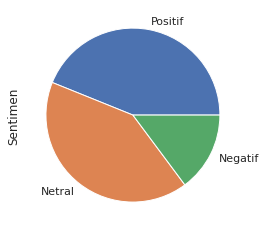

In [ ]:
sa['Sentimen'].value_counts().plot(kind='pie')

Didapat bahwa user di twitter cenderung memberikan tweet yang positif/netral terhadap topik Piala Dunia atau khususnya "pildun".

Untuk model checking, karena label netral cukup banyak, maka akan di drop. 

Kemudian, nilai sentimen positif dan negatif tidak seimbang sehingga akan dilakukan penggunaan  Skor AUPRC untuk mengevaluasi model daripada Akurasi. (Rosenberg,2022)

In [ ]:
sa['Sentimen'].value_counts() #data tidak seimbang, pemilihan model dilihat dari nilai AURC

Positif    5247
Netral     4938
Negatif    1771
Name: Sentimen, dtype: int64

In [ ]:
#because neutral too many, only using positive and negative sentiment
filter = sa['Sentimen'].str.contains('Netral')
sa = sa[~filter]

In [ ]:
sa.shape

(7018, 2)

In [ ]:
sa['Subjectivity'] = sa['Tweet'].apply(getSubjectivity)
sa['Polarity'] = sa['Tweet'].apply(getPolarity)

In [ ]:
num = ['Subjectivity','Polarity']
cat = ['tweet']
sa[num].describe()

,Subjectivity,Polarity
count,7018.000000,7018.000000
mean,0.219247,0.040193
std,0.343125,0.159064
min,0.000000,-1.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.333333,0.000000
max,1.000000,1.000000




1.   Berdasarkan Subjectivitas, rata-rata mendapat nilai 0.22, yang berarti sentiment konsumen sedikit cenderung subjektif
2.   Berdasarkan Polaritas, rata-rata mendapat nilai 0.04, yang berarti sentiment konsumen sedikit cenderung positif

In [ ]:
#Split postive and negative sentiment
sa_clean_pos = sa[sa['Sentimen']=='Positif']
sa_clean_neg = sa[sa['Sentimen']=='Negatif']

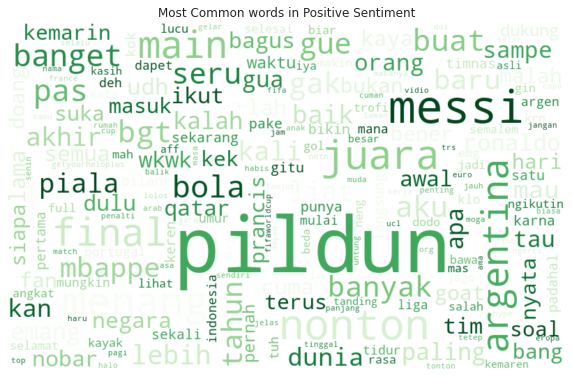

<Figure size 432x288 with 0 Axes>

In [ ]:
all_words = ' '.join([text for text in sa_clean_pos['Tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21,colormap='Greens',background_color="white",collocations=False, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common words in Positive Sentiment")
plt.show()
plt.savefig("cloud_1.jpg", format="jpg")
plt.show()

Didapat bahwa kata positif yang paling sering muncul/digunakan oleh user di twitter setelah dilakukan labeling yaitu "argentina","messi","seru","juara", dan "baik". Hal ini sangat memungkinkan mengingat messi dan argentina merupakan juara piala dunia 2022 dan banyak orang merayakan kemenangan tersebut.

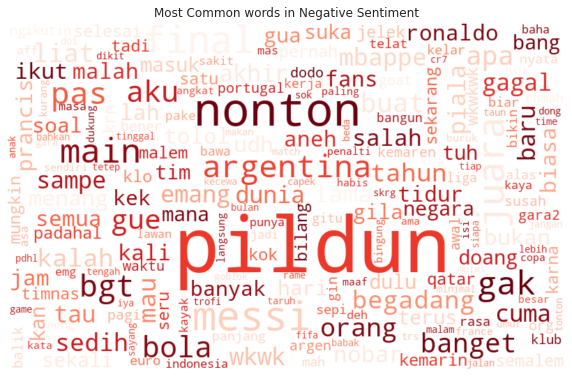

<Figure size 432x288 with 0 Axes>

In [ ]:
all_words = ' '.join([text for text in sa_clean_neg['Tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21,colormap='Reds',background_color="white",collocations=False, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common words in Negative Sentiment")
plt.show()
plt.savefig("cloud_1.jpg", format="jpg")
plt.show()

Didapat bahwa kata negatif yang paling sering muncul/digunakan oleh user di twitter setelah dilakukan labeling yaitu "gagal","kalah","ronaldo", "salah", dan "selesai". Hal ini sangatlah wajar karena banyak yang memang menyangkan kekalahan ronaldo, dan juga prancis dalam pertandingan final.

### **MODELING**

In [ ]:
df.head()

,Unnamed: 0,tweet,clean_tweet
0,0,"@kinaru_ @MalihDhakal @registaco Main, ngacak ...",main ngacak ngacak arsenal final uel bahkan do...
1,1,@Info_Ronaldo7 @idextratime Lawakan dodolover ...,lawa dodolover pagi hari idola noh lama pildun...
2,2,"Sejak liat jerman di pildun, gue bilang juga a...",sejak liat jerman pildun gue bilang apa adab b...
3,3,Mo salah mo salah lagi lagi lu ye. Pantes mesi...,salah salah pantes mesir masuk pildun fix gaco...
4,4,@CNNIndonesia Pake baju prancis di indonesia w...,pake baju prancis indonesia waktu pildun haram


In [ ]:
#vectorizer

from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
bow_vectorizer = CountVectorizer(max_df=0.90,min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(sa['Tweet'])

In [ ]:
train_bow = bow[:,:3509]
test_bow = bow[3509:,:]

#split data into train & valid set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow,sa['Sentimen'],
                                                        random_state=42,
                                                        test_size=0.2)

In [ ]:
##MOdel Definition
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
##CEK AKURASI
from sklearn.metrics import classification_report, f1_score, accuracy_score, recall_score, precision_score

In [ ]:
def evaluate_model(model, x_test = xvalid_bow, y_test = yvalid):
    y_pred = model.predict(x_test)    
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('------')
    print('Confusion Matrix:')
    print()
    print(classification_report(y_test, y_pred))
    print('------')
    
    plot_roc_curve(model, x_test, y_test)
    print('Area under Curve of the ROC:', roc_auc_score(y_test,
                                                       model.predict_proba(x_test)[:,1]))

Accuracy: 0.8368945868945868
------
Confusion Matrix:

              precision    recall  f1-score   support

     Negatif       0.70      0.57      0.63       337
     Positif       0.87      0.92      0.90      1067

    accuracy                           0.84      1404
   macro avg       0.78      0.74      0.76      1404
weighted avg       0.83      0.84      0.83      1404

------
Area under Curve of the ROC: 0.8436449292088803


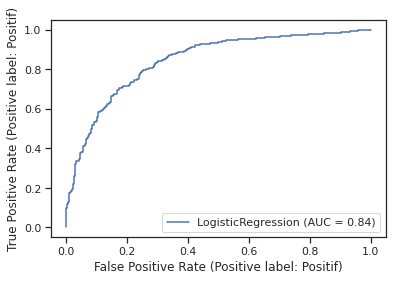

In [ ]:
#Logistic Regresion

lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain)
evaluate_model(lreg,xvalid_bow,yvalid)

Accuracy: 0.8347578347578347
------
Confusion Matrix:

              precision    recall  f1-score   support

     Negatif       0.69      0.58      0.63       337
     Positif       0.87      0.92      0.89      1067

    accuracy                           0.83      1404
   macro avg       0.78      0.75      0.76      1404
weighted avg       0.83      0.83      0.83      1404

------
Area under Curve of the ROC: 0.8328128172112387


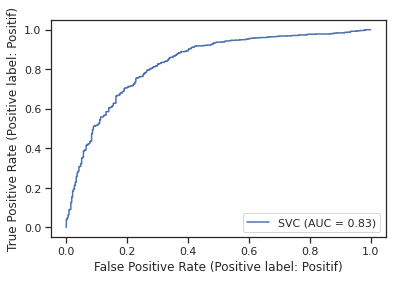

In [ ]:
#SVC
svc = SVC(kernel='linear', C=1,probability= True)
svc.fit(xtrain_bow, ytrain)
evaluate_model(svc,xvalid_bow,yvalid)

Accuracy: 0.8333333333333334
------
Confusion Matrix:

              precision    recall  f1-score   support

     Negatif       0.67      0.61      0.64       337
     Positif       0.88      0.91      0.89      1067

    accuracy                           0.83      1404
   macro avg       0.77      0.76      0.76      1404
weighted avg       0.83      0.83      0.83      1404

------
Area under Curve of the ROC: 0.8403730473692848


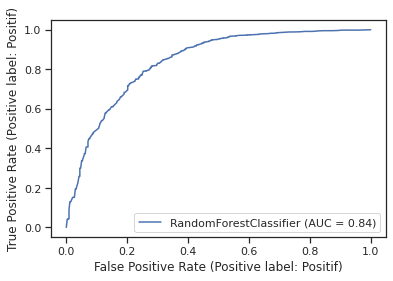

In [ ]:
#RandomForest
rf = RandomForestClassifier(random_state=42)
rf.fit(xtrain_bow, ytrain)
evaluate_model(rf,xvalid_bow,yvalid)

Accuracy: 0.8048433048433048
------
Confusion Matrix:

              precision    recall  f1-score   support

     Negatif       0.74      0.29      0.41       337
     Positif       0.81      0.97      0.88      1067

    accuracy                           0.80      1404
   macro avg       0.78      0.63      0.65      1404
weighted avg       0.79      0.80      0.77      1404

------
Area under Curve of the ROC: 0.8111805750613912


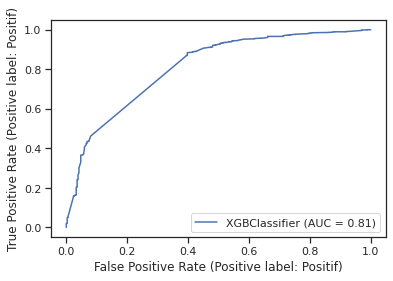

In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier()
xgb_model.fit(xtrain_bow, ytrain)
evaluate_model(xgb_model,xvalid_bow,yvalid)

Dari hasil diatas, model yang dipilih adalah logistic regression karena memiliki nilai AUPRC paling besar. 

In [ ]:
#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings('ignore')

In [ ]:
model_score = pd.DataFrame(columns=["model_f1_train","params_used", "f1","precision","recall"])


def model_prediction(model, params):
    
    model = GridSearchCV(model, param_grid= params, cv= kfold)
    
    model.fit(xtrain_bow, ytrain)
    y_pred = model.predict(xvalid_bow)
    
    print ("Model and params: ", model.best_estimator_, model.best_params_) 
    print("\n")
    print("Train score: ", model.best_score_)
    print("test score: ",accuracy_score(yvalid,y_pred))
    print("\n")
    print("Test Report:")
    print(classification_report(yvalid,y_pred))
    return y_pred, model



In [ ]:
kfold =StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

In [ ]:
def model_scoring(y_pred, model):
    global y_test
    global model_score
    
    df = pd.DataFrame(data = [[model.best_score_,
                           model.best_params_,
                           f1_score(yvalid,y_pred,average="macro"),
                           precision_score(yvalid,y_pred,average="macro"),
                           recall_score(yvalid,y_pred,average="macro")
                          ]] , 
                  columns =model_score.columns, 
                  index=[str(model.best_estimator_)])
    model_score = model_score.append ( df ) 

Accuracy: 0.8368945868945868
------
Confusion Matrix:

              precision    recall  f1-score   support

     Negatif       0.70      0.57      0.63       337
     Positif       0.87      0.92      0.90      1067

    accuracy                           0.84      1404
   macro avg       0.78      0.74      0.76      1404
weighted avg       0.83      0.84      0.83      1404

------
Area under Curve of the ROC: 0.8436449292088803


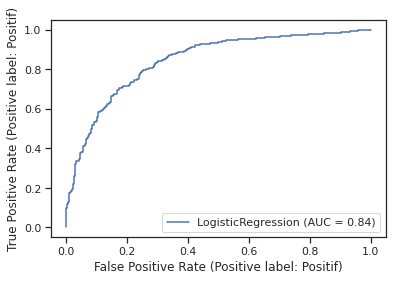

In [ ]:
log = LogisticRegression()
log.fit(xtrain_bow, ytrain)
evaluate_model(log,xvalid_bow,yvalid)

In [ ]:
# example of grid searching key hyperparametres for logistic regression
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(xtrain_bow, ytrain)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.824485 using {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.798420 (0.012483) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.798302 (0.011778) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.798361 (0.012468) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.811423 (0.011802) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.811363 (0.011772) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.811482 (0.011751) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.824425 (0.013095) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.824425 (0.013095) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.824485 (0.013087) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.800913 (0.008954) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.800913 (0.008954) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.801982 (0.009904) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.744983 (0.001596) wit

In [ ]:
log_params = {"C": [1.0],
               'penalty': ['l2','none'],
               'solver':['liblinear']}

In [ ]:
log_pred,log_m = model_prediction(log, log_params)

Model and params:  LogisticRegression(solver='liblinear') {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}


Train score:  0.824369407764725
test score:  0.8368945868945868


Test Report:
              precision    recall  f1-score   support

     Negatif       0.70      0.57      0.63       337
     Positif       0.87      0.92      0.90      1067

    accuracy                           0.84      1404
   macro avg       0.78      0.74      0.76      1404
weighted avg       0.83      0.84      0.83      1404



In [ ]:
model_scoring(log_pred, log_m)

In [ ]:
model_score

,model_f1_train,params_used,f1,precision,recall
LogisticRegression(solver='liblinear'),0.824369,"{'C': 1.0, 'penalty': 'l2', 'solver': 'libline...",0.760486,0.783938,0.744489


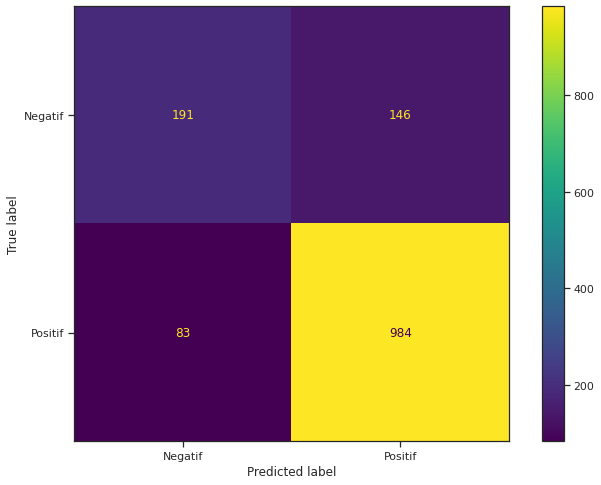

In [ ]:
# the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(12,8))
y_pred = grid_search.best_estimator_.predict(xvalid_bow)

cm = confusion_matrix(yvalid, y_pred, labels=grid_search.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=grid_search.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

True Positive =984
True Negative = 191
False Positive = 146
False Negative = 83
Accuracy = 0.84
F1 score = 0.90
 
Baseline Model dengan tidak menggunakan tuning mempunyai akurasi 82%

# **Kesimpulan**

1. Dengan Social Network Analysis (SNA), user twitter "idextratime" memiliki peran, pengaruh, dan penyalur informasi mengenai Piala Dunia 2022 paling besar terhadap user lainnya. User twitter "idextratime" memiliki fanbase yang besar dan pendekatannya dalam mencapai user lain yang terbilang "unik" menjadi penyebab besarnya pengaruh "idextratime" dalam topik Piala Dunia 2022 di twitter. 
2. Sentimen dari data cenderung memiliki sifat yang positif terhadap piala dunia, hal ini diikuti dengan beberapa kata yang sering digunakan yaitu "argentina", "messi", "seru", "juara", dan "baik". Hal ini terlihat jelas dari masifnya euforia dan dukungan yang diterima oleh tim juara, yaitu Argentina dan Messi yang difavoritkan banyak orang untuk menjuarai edisi piala dunia tahun ini.
3. Berdasarkan Subjectivitas, rata-rata mendapat nilai 0.22, yang berarti sentiment pengguna twitter terhadap topik piala dunia sedikit cenderung subjektif
4. Berdasarkan Polaritas, rata-rata mendapat nilai 0.04, yang berarti sentiment  pengguna twitter terhadap topik piala dunia sedikit cenderung positif
5. Model terbaik yang didapatkan menggunakan BoW + Logistic Regression dengan akurasi 84%, naik 2% dari sebelum melakukan tuning pada data

# **Saran**
1. Model Machine Learning yang didapatkan mempunyai akurasi 84% dengan F1 score 0.90, model ini dapat digunakan untuk mengindentifikasi sentimen dengan cukup bagus
2. Akun twitter idextratime mempunyai pengaruh yang cukup besar pada sosial media twitter dengan topik piala dunia. Hal ini bisa menjadi rujukan untuk akun twitter dan pihak media lain untuk meningkatkan jangkauan impresi mereka.